# SVM Result: Train Dataset

In this section, we will fit the SVM to our training dataset and see its performance. We will use the tuned hyperparameters in the previous [section](SVMtuning.ipynb).

In [6]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import numpy as np 
import pandas as pd 
import pickle

In [8]:
feature_matrix_train = pd.read_csv("./data/final_feature_matrix.csv", index_col = 0)
X = feature_matrix_train.drop("fraudulent", axis = 1).values
y = feature_matrix_train.fraudulent.values

In [9]:
svm_model = SVC(C = 10,
                gamma = 1,
                kernel = 'rbf')

svm_model.fit(X, y)

SVC(C=10, gamma=1)

In [10]:
y_predict =svm_model.predict(X)

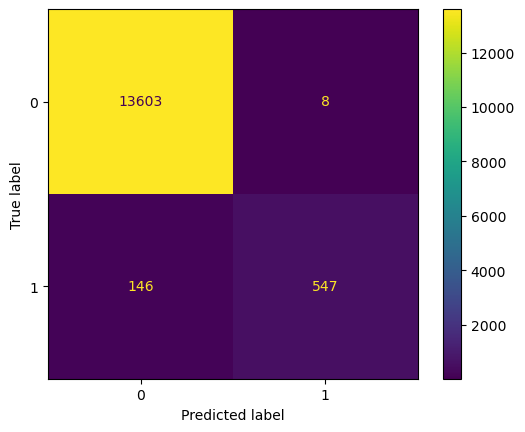

In [11]:
cm = confusion_matrix(y, y_predict, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()

In [12]:
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13611
           1       0.99      0.79      0.88       693

    accuracy                           0.99     14304
   macro avg       0.99      0.89      0.94     14304
weighted avg       0.99      0.99      0.99     14304



The performance of the SVM on the train data looks fair. The SVM performs worse than the random forest model, especially in recall rate. However, the result implies that the SVM overfits less than the SVM in the previous work, so it is excellent that we fixed the overfitting in the previous work!

In [13]:
with open('./pickle/svm_model.pkl', 'wb') as f:
        pickle.dump(svm_model, f)